# Support Vector Machines
SVMs are used for classification and seperation from other classes. 
Example:-
- Linear SVM Classification
- Soft Margin Classification
- Non-linear SVM Classification
And much more

In [1]:
# We will use Iris dataset for calssification

In [2]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC


In [3]:
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] # Petal length, Petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris virginica

In [4]:
X

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [5]:
iris.target.ndim

1

In [6]:
y.mean()

0.3333333333333333

In [7]:
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge")),
])

In [8]:
svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [9]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

# Non-Linear SVM Classification

- Non-linear SVM classifiers are efficient and work well in many cases.
- One approach to handle non-linear features is to add more features, such as polynomial features.

## Example showing need of polynomial features for non-linear seperable datasets

Text(0.5, 1.0, "This is a non-linear seperable dataset i.e. it can't be seperated using linear classification algorithms")

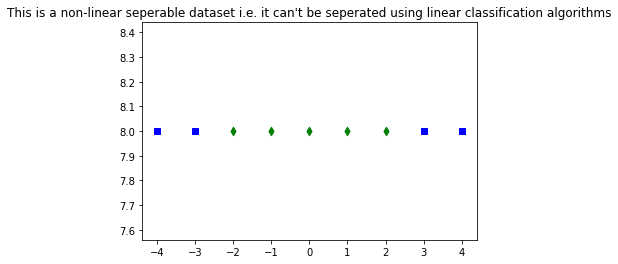

In [10]:
# Example for solving non-linear seperable datasets
import matplotlib.pyplot as plt
plot_x_green = [-2, -1, 0, 1, 2]
plot_y_green = [8, 8, 8, 8, 8]
plot_x_blue = [-4, -3, 3, 4]
plot_y_blue = [8, 8, 8, 8]

plt.scatter(plot_x_green, plot_y_green, color='green', marker="d")
plt.scatter(plot_x_blue, plot_y_blue, c="b", marker="s" )
plt.title("This is a non-linear seperable dataset i.e. it can't be seperated using linear classification algorithms")


In [11]:
[6]*6

[6, 6, 6, 6, 6, 6]

Text(0.5, 1.0, 'This dataset is linearly seperable now.')

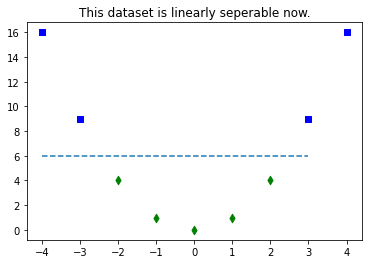

In [12]:
# but if we add polynomial feature
def addFeature(x, y):
    for i in range(len(y)):
        y[i] = x[i]**2

    return y

plot_y_green = addFeature(plot_x_green, plot_y_green)
plot_y_blue = addFeature(plot_x_blue, plot_y_blue)


plt.scatter(plot_x_green, plot_y_green, color='green', marker="d")
plt.scatter(plot_x_blue, plot_y_blue, c="b", marker="s" )
plt.plot(range(-4, 4), [6]*8, linestyle="dashed")
plt.title("This dataset is linearly seperable now.")



## Implementing using scikit learn

In [13]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures


X, y = make_moons(n_samples=100, noise=0.5)
polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scalar", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss='hinge')),

])

polynomial_svm_clf.fit(X, y)

c:\Users\amitk\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scalar', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

In [14]:
print(X, y)

[[-0.20824201 -0.52687599]
 [-0.05178756  0.32813351]
 [ 0.60746359  0.74646461]
 [ 1.00824089 -1.18057319]
 [-0.7408089   0.49861463]
 [ 0.52047521 -0.60874669]
 [-1.60610226  0.774737  ]
 [ 0.67298386  0.44557033]
 [ 0.1538511   1.43133175]
 [-1.21344765  0.48023699]
 [-0.60110423  0.54930234]
 [ 1.4273133  -0.43072139]
 [-0.37074631  0.05334019]
 [ 0.6313201   0.08148662]
 [-0.49348449  1.11719984]
 [ 2.11501096  0.24479008]
 [ 0.27585531 -0.84844134]
 [ 0.6035259  -0.98959037]
 [-0.46229574  0.73484537]
 [ 1.24159085  0.08608062]
 [-0.0308692   0.38596523]
 [ 1.63473283 -0.02898374]
 [ 0.29735063 -1.02084454]
 [-1.14340686  1.1347281 ]
 [ 0.64602164  0.77521407]
 [ 0.50088611  1.40981347]
 [-0.28605624  0.3561848 ]
 [ 2.63473072  0.60718796]
 [ 1.57731507  0.11481586]
 [ 2.02631712 -0.08852634]
 [-0.54165005  0.90969533]
 [ 1.6573992   0.54115164]
 [ 0.09009612  0.92200596]
 [ 1.06906471  0.42076299]
 [-0.83996612 -0.2322318 ]
 [ 1.24184862  0.76110041]
 [-0.54370116  1.4977743 ]
 

# Polynomial Kernel
 - It is a technique to tackle the problem of low degree polynomial and high degree polynomials
 - As for low degree polynomial this method cannot deal with complex datasets and with high polynomial degree it creates huge number of features,making the model too slow.

In [15]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel='poly', degree=3, coef0=1, C=5))
])

poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

# Similarity feaures
- Another technique to tackle nonlinear problems is to add features computed using similarity function, which measures how much each instance resembles a particukar landmark.
### Some similarity functions
 - Gaussian RBF (Gaussian Radial Basis Function). [ phi(x, l) = exp(-gamma * || x - l ||^2) ]

<code>Note: Though the similarity function method is good, but it is computationally expensive.</code>
